# Linear Regression

## Build From Scratch

In [1]:
%matplotlib inline
import torch 
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
# data preparation
num_inputs = 2
num_examples = 100
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
# add noise
labels += torch.from_numpy(np.random.normal(0, 0.01, size = labels.size()))

In [3]:
def user_svg_display():
    display.set_matplotlib_formats('svg')

In [4]:
def set_figsize(figsize = (3.5, 2.5)):
    user_svg_display()
    plt.rcParams['figure.figsize'] = figsize

In [5]:
set_figsize()

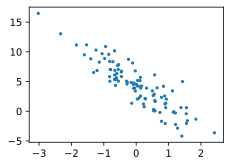

In [6]:
plt.scatter(features[:,1].numpy(), labels.numpy(), 5)

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [8]:
# get a bach
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-1.6578, -0.1375],
        [-0.0733, -1.4027],
        [ 0.9478, -1.0536],
        [ 0.4018,  0.7797],
        [-1.0855,  0.5832],
        [-0.5855,  0.1366],
        [ 0.6821,  0.1182],
        [ 0.0657, -0.7909],
        [-1.1489,  0.5401],
        [ 0.9951, -3.0245]], dtype=torch.float64) tensor([ 1.3520,  8.8221,  9.6818,  2.3532,  0.0562,  2.5735,  5.1573,  7.0130,
         0.0760, 16.4757], dtype=torch.float64)


In [9]:
# initialize parameters
w  = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype = torch.float64)
b = torch.zeros(1, dtype = torch.float)
w.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)

tensor([0.], requires_grad=True)

In [10]:
# Model
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [11]:
# Loss Function
def squred_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [39]:
# Optimizer
# Change directly in the same memory
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [13]:
# Train
lr = 0.03
num_epochs = 3
net = linreg
loss = squred_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f ' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 8.971253 
epoch 2, loss 4.885749 
epoch 3, loss 2.666962 


## Use the Tools!

In [176]:
# generate data -- same as before
# data preparation
num_inputs = 2
num_examples = 100
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
# add noise
labels += torch.from_numpy(np.random.normal(0, 0.01, size = labels.size()))

In [177]:
import torch.utils.data as Data

batch_size = 10
dataset = Data.TensorDataset(features, labels)
data_iter = Data.DataLoader(dataset, batch_size, shuffle = True)

`dataset.tensors[0]` = features
`dataset.tensors[1]` = labels

In [178]:
for X, y in data_iter:
    print(X.shape, y.shape)
#     break

torch.Size([10, 2]) torch.Size([10])
torch.Size([10, 2]) torch.Size([10])
torch.Size([10, 2]) torch.Size([10])
torch.Size([10, 2]) torch.Size([10])
torch.Size([10, 2]) torch.Size([10])
torch.Size([10, 2]) torch.Size([10])
torch.Size([10, 2]) torch.Size([10])
torch.Size([10, 2]) torch.Size([10])
torch.Size([10, 2]) torch.Size([10])
torch.Size([10, 2]) torch.Size([10])


In [179]:
# Model: 使用 nn.Module 类
import torch.nn as nn

class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
        # bias = True by default
        
    def forward(self, x):
        y = self.linear(x)
        return y

In [180]:
net = LinearNet(num_inputs)
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [184]:
# nn.Sequential
## Method 1
net = nn.Sequential(nn.Linear(num_inputs, 1))
print(net)

## Method 2 (with customized layer name)
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
print(net)

## Method 3: (with customized layer name)
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
    ('linear', nn.Linear(num_inputs, 1))
]))
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)
Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [182]:
# check all learnable params
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.5927, -0.6719]], requires_grad=True)
Parameter containing:
tensor([-0.1548], requires_grad=True)


In [183]:
# Initialize
from torch.nn import init
init.normal_(net[0].weight, mean = 0, std = 0.01)
init.constant_(net[0].bias, val = 0)

Parameter containing:
tensor([0.], requires_grad=True)

In [140]:
# loss function
loss = nn.MSELoss()

In [185]:
# optimizer
import torch.optim as optim 

optimizer = optim.SGD(net.parameters(), lr = 0.03)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [142]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[ 0.0128, -0.0022]], requires_grad=True),
   Parameter containing:
   tensor([0.], requires_grad=True)],
  'lr': 0.03,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False}]

In [143]:
optimizer.param_groups[0].keys()

dict_keys(['params', 'lr', 'momentum', 'dampening', 'weight_decay', 'nesterov'])

In [144]:
optimizer.param_groups[0]['lr']

0.03

In [145]:
for param_group in optimizer.param_groups:
    param_group['lr'] *= 0.1
optimizer.param_groups[0]['lr']

0.003

In [194]:
# Training
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        X, y = torch.tensor(X, dtype = torch.float32), torch.tensor(y, dtype = torch.float32)
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad()
        # 与之前的 net.zero_grad() 等价
        l.backward() # 反向传播
        optimizer.step() # 根据上一步梯度更新参数
    print('opoch %d, loss: %f' % (epoch, l.item()))

opoch 1, loss: 0.000101
opoch 2, loss: 0.000075
opoch 3, loss: 0.000096


C:\Users\RY\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [198]:
dense = net[0] # actually all parts of this net
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 1.9995, -3.3999]], requires_grad=True)
4.2 Parameter containing:
tensor([4.1996], requires_grad=True)
